# Preprocessing Data

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class DataReturnProcessing(object):
    def __init__(self):
        self.df = None
        
    def get_df(self):
        return self.df        
        
    def set_df(self):
        self.df = df
    
    # get infomation of dataframe
    def info(self):
        if self.df is None:
            print("The database is empty")
        else: print((self.df).info())
    
    # get top 5 rows' data:
    def head(self):
        if self.df is None:
            print("The database is empty")
        else: print((self.df).head())    
    
    # Read data from csv file
    def get_stock(self, ticker):
        path = './Data/{}.csv'.format(ticker)
        self.df = pd.read_csv(path)
        return self.df
    
    # Calculate the daily returns
    def dailyReturns(self):
        daily_return = [(self.df)['Close'][i]/(self.df)['Close'][i-1]-1 for i in range(1, len((self.df)))]
        daily_return.insert(0,0)
        (self.df)['returns'] = daily_return
        return self.df
    
    # Choose the correct data range from 2018-01-01 to 2018-12-31
    def masking(self, date1, date2):
        mask = ((self.df)['Dt'] >= date1) & ((self.df)['Dt'] <= date2)
        self.df = (self.df)[mask].reset_index(drop=True)
        return self.df
    
    # def function for returns'information num_returns, first_return, last_return, avg_return
    def return_info(self):
        num_returns = len((self.df)['returns'])  # Number of returns in year 2018
        first_return = (self.df)['returns'][0] # The return on the earliest date in 2018
        last_return  = (self.df)['returns'].iloc[-1] # The return on the latest date in 2018
        avg_return  = (self.df)['returns'].mean()  # The average return over the  year 2018

        print("There are {num:d} returns. First={first:3.6f}, Last={last:3.6f}, Avg={avg:3.6f}".format(num=num_returns, first=first_return, last=last_return, avg=avg_return))


In [5]:
class Linear_Regression(object):
    def __init__(self, df):
        self.df = df
        self.y_train = None
        self.y_test = None
        self.X_train = None
        self.X_test = None
        self.regressor = None

    def get_df(self):
        return self.df        
    
    def get_y_train(self):
        return self.y_train
    
    def get_y_test(self):
        return self.y_test
    
    def get_X_train(self):
        return self.X_train
    
    def get_X_test(self):
        return self.X_test
    
    def get_regressor(self):
        return self.regressor

    def set_df(self):
        self.df = df
    
    def set_y_train(self, d):
        self.y_train = d
   
    def set_y_test(self,d):
        self.y_test = d

    def set_X_train(self, d):
        self.X_train = d
    
    def set_X_test(self, d):
        self.X_test = d
    
    def train_test_split_mine(self, df2, date1, date2):
        self.y_train = (self.df)[((self.df)['Dt'] >= date1) & ((self.df)['Dt'] < date2)]['returns'].values
        self.y_test = (self.df)[(self.df)['Dt'] >= date2]['returns'].values

        self.X_train = df2[(df2['Dt'] >= date1) & (df2['Dt'] < date2)]['returns'].values.reshape(-1,1)
        self.X_test = df2[(df2['Dt'] >= date2)]['returns'].values.reshape(-1,1)

        return self.y_train, self.y_test, self.X_train, self.X_test
    
    def train_test_split_y(self, date1, date2):
        self.y_train = (self.df)[((self.df)['Dt'] >= date1) & ((self.df)['Dt'] < date2)]['returns'].values
        self.y_test = (self.df)[(self.df)['Dt'] >= date2]['returns'].values
        #print(self.train, self.test)
        # return self.train, self.test
        
        
    def train_test_split_X(self, date1, date2): 
        self.X_train = (self.df)[((self.df)['Dt'] >= date1) & ((self.df)['Dt'] < date2)]['returns'].values.reshape(-1,1)
        self.X_test = (self.df)[((self.df)['Dt'] >= date2)]['returns'].values.reshape(-1,1)
        # print(self.X_test)
        # return self_train, self_test
        
    # Define the info function for y_train, y_test set
    def train_test_set_info(self):
        if self.y_train is not None and self.y_test is not None:
            self.info(self.y_train, self.y_test)
        
        elif self.X_train is not None and self.X_test is not None:
            # print((self.X_train).reshape((1,-1))[0],(self.X_test).reshape((1,-1))[0])
            x_train = self.X_train.reshape((1,-1))[0]
            x_test = self.X_test.reshape((1,-1))[0]
            self.info(x_train, x_test)
        
        else: print('train and test set are empty')
    
    def info(self, train, test):
        train_num_returns = len(train)  # Number of returns in training set
        train_first_return = train[0] # The return on the earliest date in training set
        train_last_return  = train[-1] # The return on the latest date in training set
        train_avg_return  = train.mean()  # The average return over the  year training set

        print("Training set: There are {num:d} returns. First={first:3.6f}, Last={last:3.6f}, Avg={avg:3.6f}".format(num=train_num_returns, 
                                                                                                                     first=train_first_return, 
                                                                                                                     last=train_last_return, 
                                                                                                                     avg=train_avg_return))
        test_num_returns = len(test)  # Number of returns in test set
        test_first_return = test[0] # The return on the earliest date in test set
        test_last_return  = test[-1] # The return on the latest date in test set
        test_avg_return  = test.mean()  # The average return over the  year test set
        print("Test set: There are {num:d} returns. First={first:3.6f}, Last={last:3.6f}, Avg={avg:3.6f}".format(num=test_num_returns, 
                                                                                                                 first=test_first_return, 
                                                                                                                 last=test_last_return, 
                                                                                                                 avg=test_avg_return))
    
    def regressor_(self):
        #X_train = np.append(arr=np.ones((len(X_train),1)).astype(int), values=X_train, axis=1)
        self.regressor = LinearRegression()
        self.regressor.fit(self.X_train, self.y_train)

    def predict(self): 
        # X_test = np.append(arr=np.ones((len(X_test),1)).astype(int), values=X_test, axis=1)
        return self.regressor.predict(self.X_test)
    
    # get the beta of the linear regression model
    def linear_regression_info(self, ticker):
        beta_0 = self.regressor.intercept_    # The regression parameter for the constant
        beta_ = self.regressor.coef_  # The regression parameter for the return of SPY

        # following print works for all cases of coef_ that has more than one
        print("{t:s}: beta_0={b0:3.6f}, ".format(t=ticker,b0=beta_0) + "beta=[" + ",".join("{b1:3.6f}".format(b1=k) for k in beta_) + "]")
        return beta_0, beta_
    
    # get the average cross validation scores
    def cross_val_avg(self,n,ticker):
        accuracies = cross_val_score(estimator=self.regressor, X = self.X_train, y = self.y_train, cv=n)
        cross_val_avg = accuracies.mean()
        print("{t:s}: Avg cross val score = {sc:3.6f}".format(t=ticker, sc=cross_val_avg))
        return cross_val_avg
    
    def hedgedReturns(self, ticker): 
        beta_0, beta_ = self.linear_regression_info(ticker)
        r = np.array([float(y-beta_*x) for y, x in zip(self.y_test, self.X_test)])

        hedged_num_returns = len(r)  # Number of returns in hedged series
        hedged_first_return = r[0] # The return on the earliest date in hedged series
        hedged_last_return  = r[-1] # The return on the latest date in hedged series
        hedged_avg_return  = r.mean()  # The average return over the hedged series

        print("{t:s} hedged returns: There are {num:d} returns. First={first:3.6f}, Last={last:3.6f}, Avg={avg:3.6f}".format(t=ticker,
                                                                                                                            num=hedged_num_returns,
                                                                                                                            first=hedged_first_return, 
                                                                                                                            last=hedged_last_return, 
                                                                                                                            avg=hedged_avg_return))
        return r
    
    def predict(self):
        return (self.regressor).predict(self.X_test)


**Prepare data for AAPL**

In [6]:
aapl = DataReturnProcessing()
aapl.get_stock('AAPL')
aapl.dailyReturns()
aapl.masking('2018-01-01','2018-12-31')
aapl.info()
aapl.head()
print('\n')
aapl.return_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
Dt         251 non-null object
Close      251 non-null float64
returns    251 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB
None
           Dt   Close   returns
0  2018-01-02  172.26  0.017905
1  2018-01-03  172.23 -0.000174
2  2018-01-04  173.03  0.004645
3  2018-01-05  175.00  0.011385
4  2018-01-08  174.35 -0.003714


There are 251 returns. First=0.017905, Last=0.009665, Avg=-0.000117


**prepare data for SPY for later question**

In [7]:
spy = DataReturnProcessing()
spy.get_stock('SPY')
spy.dailyReturns()
spy.masking('2018-01-01','2018-12-31')
spy.info()
spy.head()
print('\n')
spy.return_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
Dt         251 non-null object
Close      251 non-null float64
returns    251 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB
None
           Dt   Close   returns
0  2018-01-02  268.77  0.007157
1  2018-01-03  270.47  0.006325
2  2018-01-04  271.61  0.004215
3  2018-01-05  273.42  0.006664
4  2018-01-08  273.92  0.001829


There are 251 returns. First=0.007157, Last=0.008759, Avg=-0.000203


# Split into Train and Test datasets

In [8]:
lr1 = Linear_Regression(aapl.get_df())
lr2 = Linear_Regression(spy.get_df())

In [9]:
lr1.train_test_split_y('2018-01-01','2018-10-01')

In [10]:
lr2.train_test_split_X('2018-01-01','2018-10-01')

In [11]:
print('info of y')
lr1.train_test_set_info()
print('info of X')
lr2.train_test_set_info()

info of y
Training set: There are 188 returns. First=0.017905, Last=0.003512, Avg=0.001639
Test set: There are 63 returns. First=0.006733, Last=0.009665, Avg=-0.005356
info of X
Training set: There are 188 returns. First=0.007157, Last=0.000103, Avg=0.000495
Test set: There are 63 returns. First=0.003474, Last=0.008759, Avg=-0.002286


# AAPL regression

### Apply Linear Regression Model

In [12]:
lr1.set_X_train(lr2.get_X_train())
lr1.set_X_test(lr2.get_X_test())

In [13]:
lr1.regressor_()

**Get AAPL beta_0, and beta_SPY**

In [14]:
lr1.linear_regression_info("AAPL")

AAPL: beta_0=0.001109, beta=[1.071231]


(0.0011089396291071715, array([1.07123138]))

**predict returns**

In [15]:
predict_r = lr1.predict()
predict_r

array([ 4.83054010e-03,  4.84700319e-04,  1.69680155e-03, -7.26349811e-03,
       -4.88675837e-03,  1.10893963e-03, -4.54249788e-04, -3.28096600e-02,
       -2.24866347e-02,  1.59866065e-02, -4.90812373e-03,  2.45323662e-02,
        1.29995806e-03, -1.43607950e-02,  5.27591198e-04, -3.69948356e-03,
       -4.34440362e-03, -3.13478716e-02,  2.03274733e-02, -1.77312153e-02,
       -4.82597208e-03,  1.69829436e-02,  1.25505565e-02,  1.25088080e-02,
       -5.23596487e-03,  7.01885564e-03,  7.88764507e-03,  2.40427605e-02,
       -8.35218949e-04, -9.35513870e-03, -1.89072284e-02, -8.95418892e-04,
       -6.21477705e-03,  1.22890746e-02,  3.89472191e-03, -1.70103797e-02,
       -1.87154091e-02,  4.75920556e-03, -6.04553753e-03,  1.84032733e-02,
        4.71308258e-03,  2.57744013e-02, -1.23186752e-03,  7.63845419e-03,
        1.52935742e-02, -3.36015651e-02, -5.16240258e-04, -2.37821837e-02,
        3.14109689e-03,  1.35233677e-03,  6.50301728e-03,  7.45755632e-04,
       -1.86711174e-02, -

**get the average cross validation scores**

In [16]:
lr1.cross_val_avg(5, "AAPL")

AAPL: Avg cross val score = 0.333436


0.33343567851319167

# AAPL hedged returns

In [17]:
r = lr1.hedgedReturns('AAPL')

AAPL: beta_0=0.001109, beta=[1.071231]
AAPL hedged returns: There are 63 returns. First=0.003012, Last=0.000283, Avg=-0.002907


In [18]:
date = aapl.df[(aapl.df)['Dt'] >= '2018-10-01']['Dt']

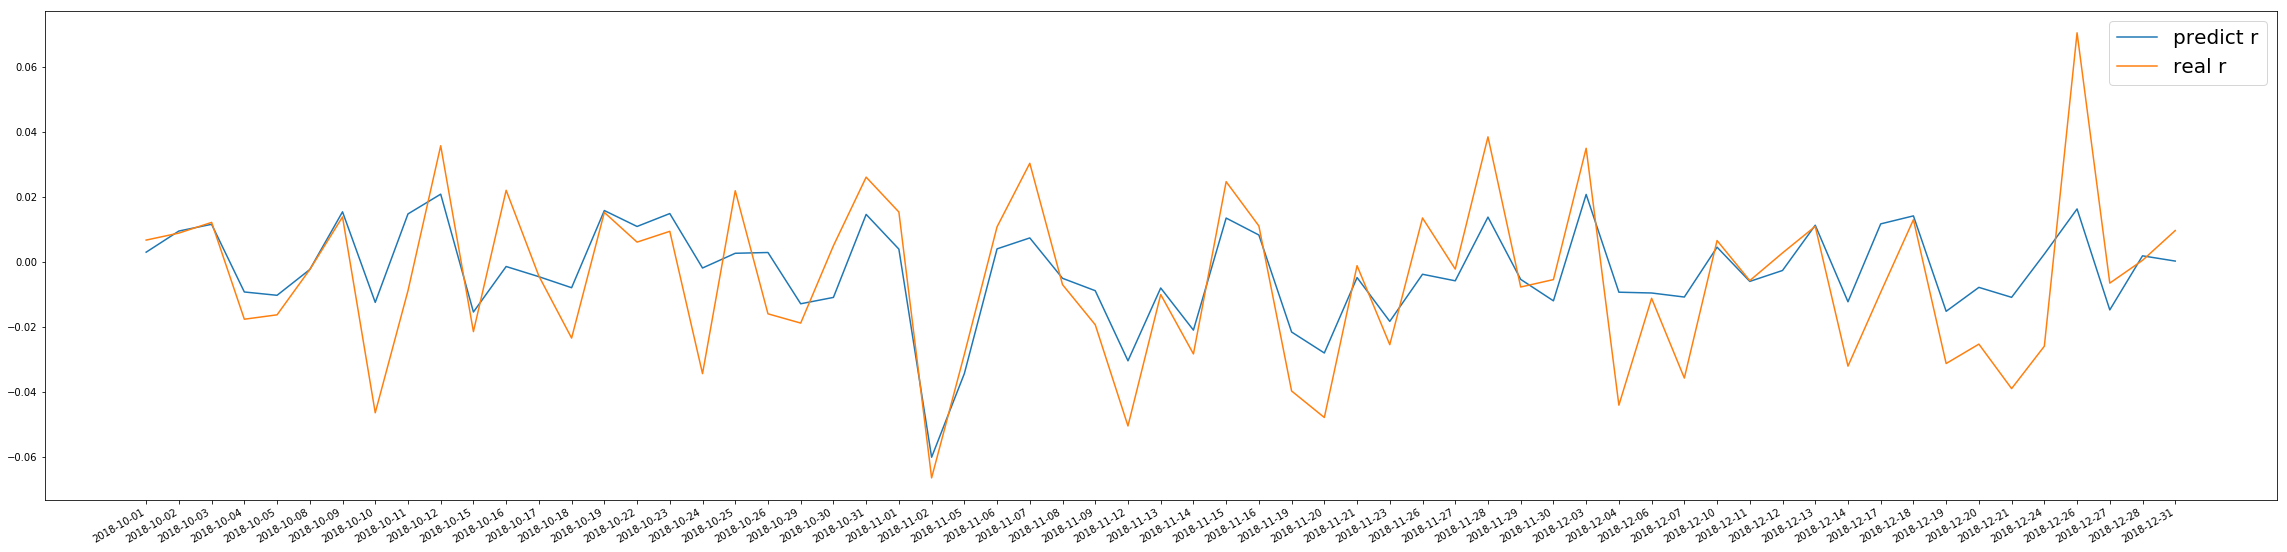

In [19]:
plt.figure(figsize=(40, 10))
plt.plot(date, r, label='predict r')
plt.plot(lr1.get_y_test(), label='real r')
plt.legend(fontsize=20)
plt.gcf().autofmt_xdate()

# BA regression

In [20]:
ba = DataReturnProcessing()
ba.get_stock('BA')
ba.dailyReturns()
ba.masking('2018-01-01','2018-12-31')
ba.info()
ba.head()
print('\n')
ba.return_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
Dt         251 non-null object
Close      251 non-null float64
returns    251 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.0+ KB
None
           Dt   Close   returns
0  2018-01-02  296.84  0.006544
1  2018-01-03  297.80  0.003234
2  2018-01-04  296.67 -0.003794
3  2018-01-05  308.84  0.041022
4  2018-01-08  310.15  0.004242


There are 251 returns. First=0.006544, Last=0.019344, Avg=0.000552


In [21]:
lr3 = Linear_Regression(ba.get_df())
lr3.train_test_split_y('2018-01-01','2018-10-01')
lr3.set_X_train(lr2.get_X_train())
lr3.set_X_test(lr2.get_X_test())

In [22]:
lr3.regressor_()

**BA: beta_0, beta_SPY**

In [23]:
lr3.linear_regression_info("BA")

BA: beta_0=0.000723, beta=[1.355684]


(0.0007231895045615291, array([1.35568368]))

**BA: cross validation score**

In [24]:
lr3.cross_val_avg(5, "BA")

BA: Avg cross val score = 0.389186


0.38918615137510726

**BA: hedged returns**

In [25]:
lr3.hedgedReturns('BA')

BA: beta_0=0.000723, beta=[1.355684]
BA hedged returns: There are 63 returns. First=0.023228, Last=0.007470, Avg=0.001138


array([ 0.02322779,  0.01146252,  0.01460402,  0.00470728, -0.00143809,
       -0.00181127,  0.00112284, -0.00369678,  0.00438962, -0.01324337,
        0.0041992 , -0.00353422, -0.00770949,  0.00275127, -0.00786314,
        0.0052993 , -0.00975683,  0.0542163 ,  0.00139372,  0.01147247,
       -0.05840058,  0.02258197, -0.0003333 ,  0.00870892, -0.00662311,
        0.00434468,  0.00382529, -0.01387913, -0.00089963,  0.00938585,
       -0.00799851, -0.01852606, -0.00443646, -0.02328673, -0.01997895,
       -0.02174859,  0.01499312, -0.00581565, -0.0067027 , -0.00895118,
        0.00071762,  0.01742814,  0.0301288 ,  0.00399728,  0.02011548,
       -0.00457794, -0.02889218,  0.0053482 ,  0.00711204, -0.01354535,
        0.00764429, -0.0032748 ,  0.00438534,  0.01837671,  0.03922413,
       -0.00563807,  0.00172666,  0.00833459,  0.00170523, -0.00128743,
       -0.00018279, -0.00064764,  0.00746962])

# Returns to Prices

In [49]:
def returns2prices(d,r,ticker, date1, date2):
    temp = d.get_df()
    mask = (temp['Dt'] >= date1)&(temp['Dt'] < date2)
    temp = temp[mask].reset_index(drop=True)
    p = [temp['Close'].iloc[-1]*(1+r[0])]
    for i in range(1,len(r)):
        p.append(p[i-1]*(1+r[i]))
    temp2 = aapl.get_df()
    mask2 = (temp2['Dt']>='2018-10-01')&(temp2['Dt']<='2018-12-31')
    temp2 = temp2[mask2].reset_index(drop = True)
    return temp2['Close'], p

In [50]:
temp2, p = returns2prices(aapl,predict_r, "AAPL", '2018-01-01', '2018-10-01')

In [28]:
num_prices = len(p)  # Number of prices in price series
first_price = p[0] # The price on the earliest date in price series
last_price  = p[-1] # The price on the latest date in price series
avg_price  = sum(p)/len(p)  # The average price over the price series

ticker="AAPL"
print("{t:s} predicted prices: There are {num:d} prices. First={first:3.2f}, Last={last:3.2f}, Avg={avg:3.2f}".format(t=ticker,
                                                                                                                    num=num_prices,
                                                                                                                    first=first_price, 
                                                                                                                    last=last_price, 
                                                                                                                    avg=avg_price))
 

AAPL predicted prices: There are 63 prices. First=226.83, Last=205.79, Avg=215.64


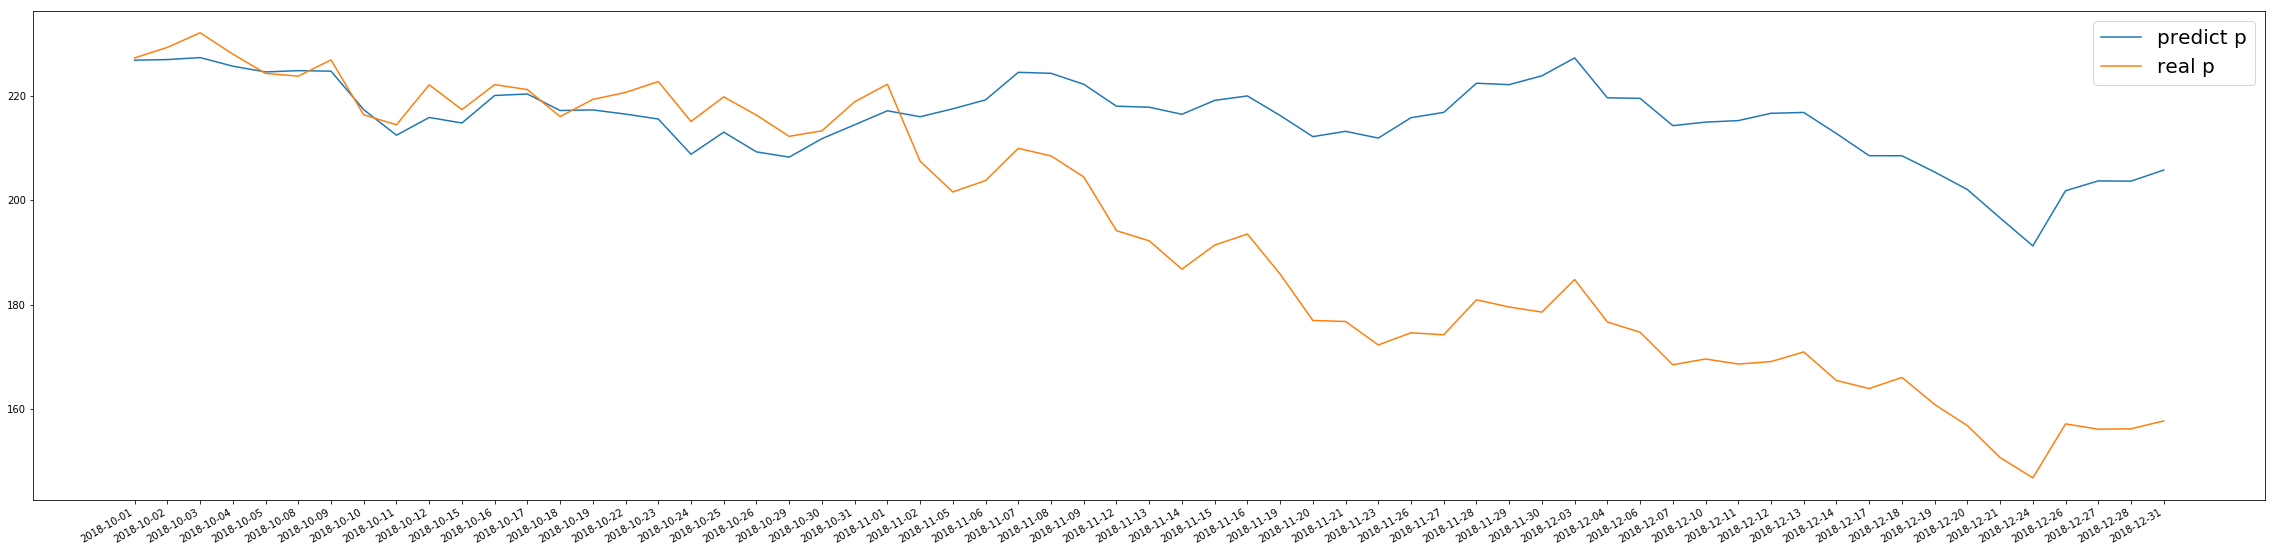

In [29]:
plt.figure(figsize=(40, 10))
plt.plot(date, p, label='predict p')
plt.plot(temp2, label='real p')
plt.legend(fontsize=20)
plt.gcf().autofmt_xdate()

# Extra Credit

**find all files beginning with the letter "X"**

In [30]:
import fnmatch
import os

tickers = []
for root, dirs, files in os.walk('./Data/'):
    for _file in files:
        if fnmatch.fnmatch(_file,'X*'):
            tickers.append(_file.split(".")[0])

In [31]:
tickers

['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']

**second_index(tickers) function is to find the largest cross validation average score if cv=5 among all matched files**

In [59]:
def second_index(tickers):
    max_ = -float('inf')
    for i in tickers:
        df = DataReturnProcessing()
        df.get_stock(i)
        df.dailyReturns()
        df.masking('2018-01-01','2018-12-31')
        
        lr = Linear_Regression(df.get_df())
        lr.train_test_split_X('2018-01-01','2018-10-01')
        
        _X_train = np.hstack((lr2.X_train, lr.X_train))
        _X_test = np.hstack((lr2.X_test, lr.X_test))
        
        lr1.set_X_train(_X_train)
        lr1.set_X_test(_X_test)

        lr1.regressor_()
        score = lr1.cross_val_avg(5,i)
        
        if max_ < score:
            max_ = score
            ind = i
    return ind, max_, lr1.linear_regression_info(ind)

In [60]:
print(second_index(tickers))

XLB: Avg cross val score = 0.328041
XLE: Avg cross val score = 0.334499
XLF: Avg cross val score = 0.362277
XLI: Avg cross val score = 0.376458
XLK: Avg cross val score = 0.549126
XLP: Avg cross val score = 0.322004
XLRE: Avg cross val score = 0.330036
XLU: Avg cross val score = 0.331107
XLV: Avg cross val score = 0.356073
XLY: Avg cross val score = 0.331377
XLK: beta_0=0.001136, beta=[1.125273,-0.055749]
('XLK', 0.5491255509414392, (0.001135734414817846, array([ 1.12527349, -0.05574888])))


### It seems that XLK is the best second index we need, it is because XLK belongs to the Technology Select Sector SPDR Fund, and AAPL is also a technology company.They are in the same sector, XLK is a good indicator.The constant is about 0.00113573, the coefficient of SPY is 1.125273, and coefficient of XLK is -0.0557488

In [34]:
print('Done')

Done
